In [1]:
library(MatchIt)
library(survival)
library(survminer)
library(tidyr)
library(tableone)
library(plotRCS)
library(rms)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma



Attaching package: ‘plotRCS’


The following object is masked from ‘package:survival’:

    cancer


Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




In [2]:
Pvalue_cut = 0.05

In [3]:
df_survival <- read.csv("df_diuretic_responsitive.csv",as.is = TRUE)
df_survival <- as.data.frame(df_survival)
#df_survival$groupHPD <- as.factor(df_survival$groupHPD)
df_select <-  df_survival
# df_select <-  df_survival[df_survival$groupHPD==1,] 
#df_select <-  df_survival[df_survival$groupHPD==2,] 
#df_select <-  df_survival[df_survival$groupHPD==3,] 


# Univariate

In [ ]:
# Covariate Setting:
# demo
# Organ disorders: Kidneys, other organs
covariates <- c('creatinine', 'urineoutput', 'baseline_Scr',
       'colloid_bolus', 'sofa_norenal', 'Congestive_heart_failure', 'weight',
       'age', 'gender', 'height',
       'aniongap', 'pt', 'sbp',  'cum_fluidbance',  
       'baseexcess', 'hemoglobin', 
       'fluidbance',  'gcs', 'mbp', 'potassium', 'spo2',
       'platelet',    'bicarbonate', 'sodium',
       'temperature',  'po2', 'ptt', 'glucose', 'pco2', 'chloride',
       'rbc', 'wbc', 'ph', 'mchc', 'mcv', 'hematocrit',
         'heart_rate', 'fio2',
       'resp_rate',  'dbp', 'mch', 
       'lactate', 'rdw', 'calcium' 
          #       'respiration_sofa', 'cardiovascular_sofa','cns_sofa','coagulation_sofa','liver_sofa', 'renal_sofa', 'sofa',
                )

univ_formulas <- sapply(covariates,function(x) as.formula(paste('Surv(survival_28day, mortality_28d)~', x)))

univ_models <- lapply( univ_formulas, function(x){coxph(x, data = df_select)})

univ_results <- lapply(univ_models,
                       function(x){ 
                          x <- summary(x)
                          p.value<-signif(x$wald["pvalue"], digits=2)
                          wald.test<-signif(x$wald["test"], digits=2)
                          beta<-signif(x$coef[1], digits=2);#coeficient beta
                          HR <-signif(x$coef[2], digits=2);#exp(beta)
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"],2)
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                          HR <- paste0(HR, " (", 
                                       HR.confint.lower, "-", HR.confint.upper, ")")
                          res<-c(beta, HR, wald.test, p.value)
                          names(res)<-c("beta", "HR (95% CI for HR)","wald.test", "p.value")
                          return(res)
                          #return(exp(cbind(coef(x),confint(x))))
                         })
res <- t(as.data.frame(univ_results, check.names = FALSE))
res <- as.data.frame(res)
res

,beta,HR (95% CI for HR),wald.test,p.value
,<chr>,<chr>,<chr>,<chr>
creatinine,0.88,2.4 (2.1-2.8),130,3.9e-29
urineoutput,-5e-04,1 (1-1),100,7.8e-24
baseline_Scr,0.83,2.3 (1.7-3),33,9.7e-09
colloid_bolus,6.5e-05,1 (1-1),15,0.00011
sofa_norenal,0.13,1.1 (1.1-1.2),110,7.8e-25
Congestive_heart_failure,0.13,1.1 (0.98-1.3),2.7,0.1
weight,-0.015,0.98 (0.98-0.99),81,2.6e-19
age,0.018,1 (1-1),52,6.6e-13
gender,-0.2,0.82 (0.71-0.94),8,0.0046


## p value of 0.05 was used to screen covariates

In [ ]:
res$p.value <- as.numeric(res$p.value)
print(paste0("Total number of variables:",dim(res)[1]))
print(paste0("The number of variables after p-value filtering:",dim(res[res$p.value <= Pvalue_cut,])[1]))

resstr <- paste(rownames(res[res$p.value <= Pvalue_cut,]), collapse = " + ")
resstr <- paste("Surv(survival_28day, mortality_28d) ~ +", resstr)
resstr

# multivariate

In [6]:
res.cox <- coxph(as.formula(resstr), data = df_select)
summary(res.cox)

Call:
coxph(formula = as.formula(resstr), data = df_select)

  n= 4713, number of events= 804 

                     coef  exp(coef)   se(coef)      z Pr(>|z|)    
creatinine      3.171e-01  1.373e+00  1.269e-01  2.498 0.012473 *  
urineoutput    -2.299e-04  9.998e-01  1.421e-04 -1.617 0.105826    
baseline_Scr    8.811e-02  1.092e+00  1.829e-01  0.482 0.630060    
colloid_bolus  -2.449e-05  1.000e+00  1.363e-04 -0.180 0.857396    
sofa_norenal    5.615e-02  1.058e+00  1.573e-02  3.571 0.000356 ***
weight         -9.766e-03  9.903e-01  1.874e-03 -5.211 1.88e-07 ***
age             1.236e-02  1.012e+00  2.767e-03  4.467 7.92e-06 ***
gender          2.384e-01  1.269e+00  1.023e-01  2.330 0.019811 *  
height         -4.836e-03  9.952e-01  4.781e-03 -1.011 0.311807    
aniongap        5.327e-02  1.055e+00  1.424e-02  3.740 0.000184 ***
pt              8.485e-03  1.009e+00  5.108e-03  1.661 0.096689 .  
sbp            -5.251e-03  9.948e-01  4.046e-03 -1.298 0.194316    
cum_fluidbance  4.28

In [ ]:
# merge
mul_cox <- summary(res.cox)
mul_HR<- round(mul_cox$coefficients[,2],2) 
mul_Pvalue<- mul_cox$coefficients[,5] #round(mul_cox$coefficients[,5],4) 
mul_CI5<-round(mul_cox$conf.int[,3],2)
mul_CI95<-round(mul_cox$conf.int[,4],2)
mul_CI<-paste0(mul_HR,' (',mul_CI5,'-',mul_CI95,')')
Variable<-row.names(data.frame(mul_cox$coefficients))
mulcox_res<- data.frame(Variable,mul_HR,mul_CI5,mul_CI95,mul_CI,mul_Pvalue)
colnames(mulcox_res)=c("Variable","HR","CI5","CI95","HR (95% CI)","Pvalue")
mulcox_res$Pvalue <- sapply(mulcox_res$Pvalue, function(x) sprintf("%.2e", x))
mulcox_res$Pvalue <- as.numeric(mulcox_res$Pvalue)
View(mulcox_res)

,Variable,HR,CI5,CI95,HR (95% CI),Pvalue
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
creatinine,creatinine,1.37,1.07,1.76,1.37 (1.07-1.76),1.25e-02
urineoutput,urineoutput,1.00,1.00,1.00,1 (1-1),1.06e-01
baseline_Scr,baseline_Scr,1.09,0.76,1.56,1.09 (0.76-1.56),6.30e-01
colloid_bolus,colloid_bolus,1.00,1.00,1.00,1 (1-1),8.57e-01
sofa_norenal,sofa_norenal,1.06,1.03,1.09,1.06 (1.03-1.09),3.56e-04
weight,weight,0.99,0.99,0.99,0.99 (0.99-0.99),1.88e-07
age,age,1.01,1.01,1.02,1.01 (1.01-1.02),7.92e-06
gender,gender,1.27,1.04,1.55,1.27 (1.04-1.55),1.98e-02
height,height,1.00,0.99,1.00,1 (0.99-1),3.12e-01


## p value of 0.05 was used to screen covariates

In [ ]:
print(paste0("Total number of variables:",dim(mulcox_res)[1]))
print(paste0("The number of variables after p-value filtering:",dim(mulcox_res[mulcox_res$Pvalue <= Pvalue_cut,])[1]))
mulcox_res_filt <- mulcox_res[mulcox_res$Pvalue <= Pvalue_cut,]

paste(rownames(mulcox_res_filt), collapse = " + ")

In [9]:
rownames(mulcox_res_filt)

[1] "creatinine"   "sofa_norenal" "weight"       "age"          "gender"      
 [6] "aniongap"     "temperature"  "ptt"          "glucose"      "ph"          
[11] "heart_rate"   "resp_rate"    "rdw"

# plot 

## Forest map

Loading required package: grid

Loading required package: checkmate

Loading required package: abind



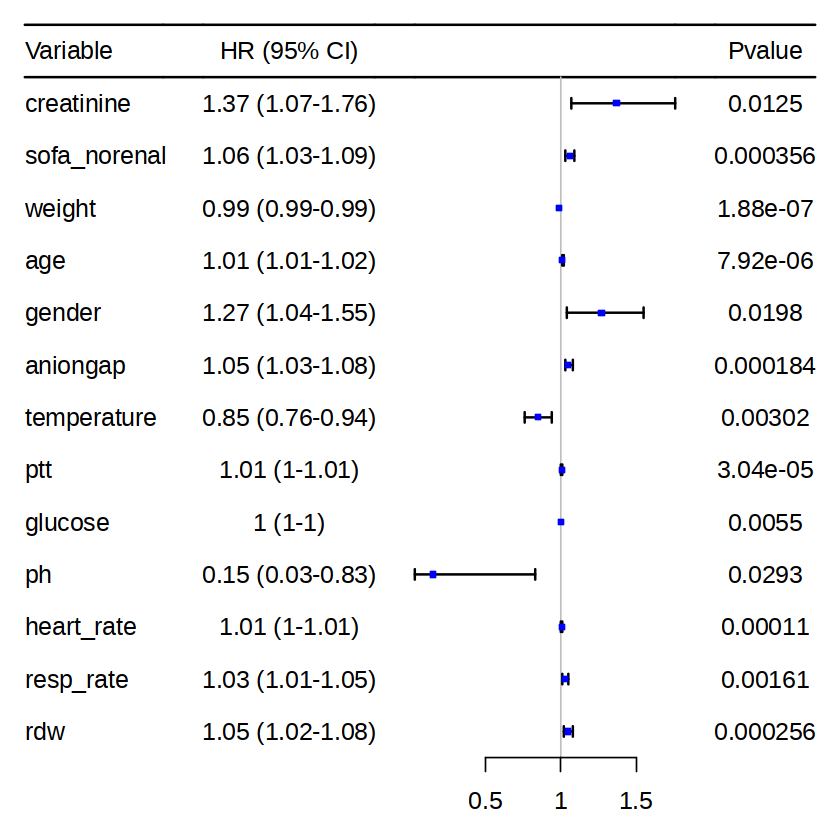

In [ ]:
library(forestplot)
dat=rbind(c("Variable", NA,NA,NA,"HR (95% CI)", "Pvalue"),mulcox_res_filt)
forestplot(dat[,c(1,5,6)], 
           mean=dat[,2],   
           lower=dat[,3], upper=dat[,4],
           zero=1,       
           boxsize=0.1,     
           graph.pos=3,
           xticks=c(0.5,1,1.5) ,
           txt_gp=fpTxtGp (
             label=gpar(cex=1.2) ,ticks=gpar(cex=1.2)
            ),
           hrzl_lines=list("1" = gpar(lty=1,lwd=1.5)
                           ,"2" = gpar(lty=1,lwd=1.5)
#                            ,"3"= gpar(lty=1,lwd=1.5)
                          ), # 
           col=fpColors ( box = 'blue ' , 
                          lines = ' black ' ,
                          zero = "grey" ),
           lwd.zero=1,
           lwd.ci=1.5, 
           lty.ci=7 ,
           ci.vertices.height=0.1   
)